<a href="https://colab.research.google.com/github/Ayy4s/datamanipulationpart1/blob/main/Find_if_there_is_a_correlation_between_the_price_of_the_apps_and_the_Content_Rating_(Teen%2C_Everyone%2C_Mature)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('cleaned_playstore.csv')

In [ ]:
#Split the dataset into four parts: df1, df2, df3, df4(veri kümesini dört parçaya ayırma)
df1, df_remainder = train_test_split(df, test_size=0.25, random_state=42)
df2, df34 = train_test_split(df_remainder, test_size=0.5, random_state=42)
df3, df4 = train_test_split(df34, test_size=0.5, random_state=42)


In [ ]:
# Pickle the datasets time(veri küme seçmece)
df1.to_pickle('df1.pkl')
df2.to_pickle('df2.pkl')
df3.to_pickle('df3.pkl')
df4.to_pickle('df4.pkl')

In [ ]:
#Unpickle the individual dataset files(seçimleri kaldırma)
with open('df2.pkl', 'rb') as f:
    df2 = pd.read_pickle(f)

In [ ]:
with open('/content/df2.pkl', 'rb') as f:
    df2 = pickle.load(f)

with open('/content/df4.pkl', 'rb') as f:
    df4 = pickle.load(f)

with open('/content/df1.pkl', 'rb') as f:
    df1 = pickle.load(f)

with open('/content/df3.pkl', 'rb') as f:
    df3 = pickle.load(f)

In [ ]:
#Merge the datasets in the 2-4-1-3
merged_df = pd.concat([df2, df4, df1, df3], ignore_index=True)

In [ ]:
#sırayı terse çevirme(Reverse the order of rows)
reversed_df = df[::-1]

In [ ]:
#pencere parametlerini tanımlama(Define the sliding window parameters)
window_size = 5
stride = 1

In [ ]:
#Apply the sliding window and listede saklama(Apply the sliding window technique and store the patches in a 2D list)
patches = []
for i in range(0, len(df) - window_size + 1, stride):
    patch = df.iloc[i:i+window_size].values.tolist()
    patches.append(patch)

In [ ]:
#begins
import pandas as pd
from scipy.stats import spearmanr


In [ ]:

df = pd.read_csv('/content/cleaned_playstore.csv')


In [ ]:
#Select the relevant columns for analysis(analiz için sütunlar)
selected_columns = ['Price', 'Content Rating']
data = df[selected_columns].copy()

In [ ]:
#Convert the 'Price' column to a numeric(fiyat sütununu sayısala dönüştürme)
data['Price'] = pd.to_numeric(data['Price'].replace('$', ''))

In [ ]:
#Map the content rating values to numeric labels for correlation analysis?????????
rating_map = {'Everyone': 1, 'Teen': 2, 'Mature': 3}
data['Content Rating'] = data['Content Rating'].map(rating_map)

In [ ]:
#Drop any rows with missing values(eksik değerleri bırak dropla)
data = data.dropna()

In [ ]:
#Calculate the correlation coefficient(Korelasyon katsayısını hesaplama)
correlation, p_value = spearmanr(data['Price'], data['Content Rating'])


In [ ]:
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: -0.037990438739185846
p-value: 0.00032733287800625164


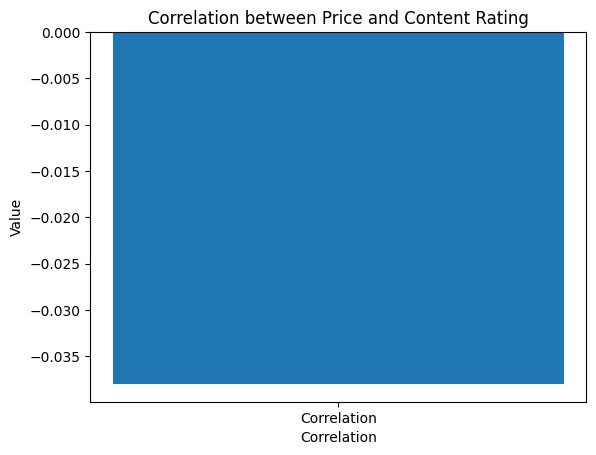

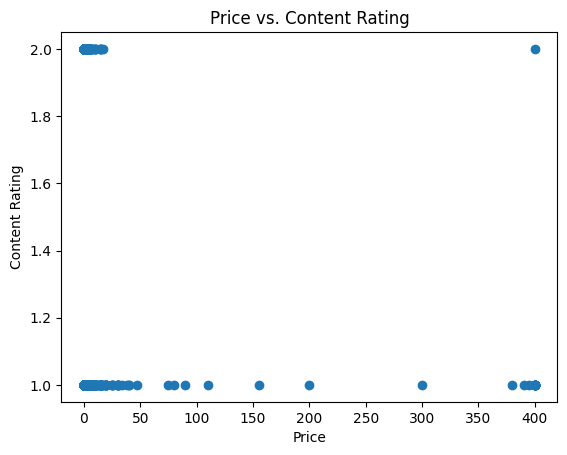

In [ ]:
import matplotlib.pyplot as plt

# Plotting a bar graph
plt.bar(['Correlation'], [correlation])
plt.xlabel('Correlation')
plt.ylabel('Value')
plt.title('Correlation between Price and Content Rating')
plt.show()

# Plotting a scatter plot
plt.scatter(data['Price'], data['Content Rating'])
plt.xlabel('Price')
plt.ylabel('Content Rating')
plt.title('Price vs. Content Rating')
plt.show()

